In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [118]:
df = pd.read_csv("C:/Users/luson/IH_LABS/lab-eda-univariate/amz_uk_price_prediction.csv")

In [122]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.70,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.70,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.70,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.70,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.60,1881,17.99,False,0,Hi-Fi Speakers


In [120]:
df.shape

(2443651, 9)

In [121]:
df.dtypes

uid                    int64
asin                  object
title                 object
stars                float64
reviews                int64
price                float64
isBestSeller            bool
boughtInLastMonth      int64
category              object
dtype: object

In [127]:
# Part 1: Understanding Product Categories
# Business Question: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

In [133]:
# Generate a frequency table for the product category. Which are the top 5 most listed product categories?
# The .value_counts() method in pandas automatically sorts the values in descending order by frequency (i.e., most common value first).
frequency_table = df["category"].value_counts()
top_5_frequency_table = frequency_table.head(5)
top_5_frequency_table

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

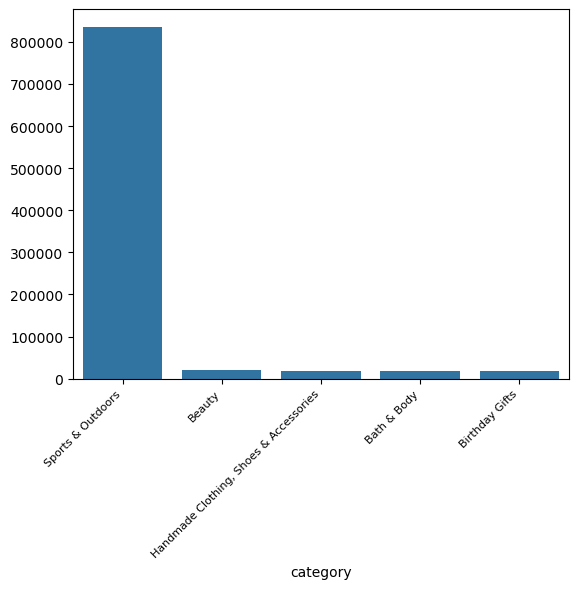

In [112]:
# Display the distribution of products across different categories using a bar chart.
sns.barplot(x = top_5_frequency_table.index, y = top_5_frequency_table.values)
plt.xticks(rotation=45, fontsize=8, ha='right') # Adjust font size, rotation of x-axis labels, ha = horizontal alignment
plt.show()

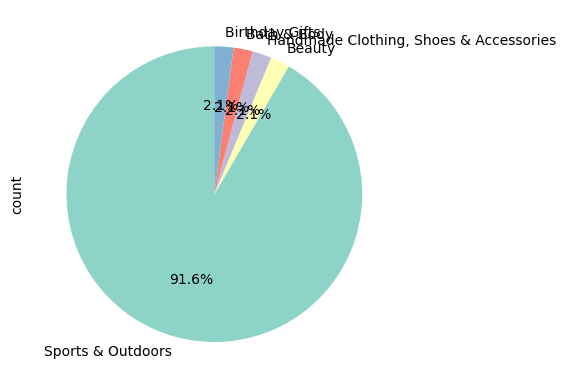

In [114]:
# For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?
top_5_frequency_table.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3"))
plt.show()

In [165]:
# Part 2: Delving into Product Pricing
# Business Question: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

In [159]:
# Measures of Centrality:
# Calculate the mean, median, and mode for the price of products.
df["price"].describe()

count   2443651.00
mean         89.24
std         345.61
min           0.00
25%           9.99
50%          19.09
75%          45.99
max      100000.00
Name: price, dtype: float64

In [241]:
# Calculate the mean, median, and mode for the price of products.
mean_price = round(df['price'].mean(),2)
median_price = df['price'].median()
mode_price = df['price'].mode()[0] # mode can be mutiple, [0] returns the first mode.

mean_price,median_price,mode_price

(89.24, 19.09, 9.99)

In [183]:
# Measures of Dispersion:
# Determine the variance, standard deviation, range, and interquartile range for product price.
std_price = round(df['price'].std(),2) # 标准差
var_price= round(df['price'].var(),2) # 方差
min_price = round(df['price'].min(),2)
max_price = round(df['price'].max(),2)
range_price = round(max_price - min_price,2)
std_price, var_price, min_price, max_price, range_price
# How varied are the product prices? Are there any indicators of a significant spread in prices?
# Is there a specific price range where most products fall?

(345.61, 119445.49, 0.0, 100000.0, 100000.0)

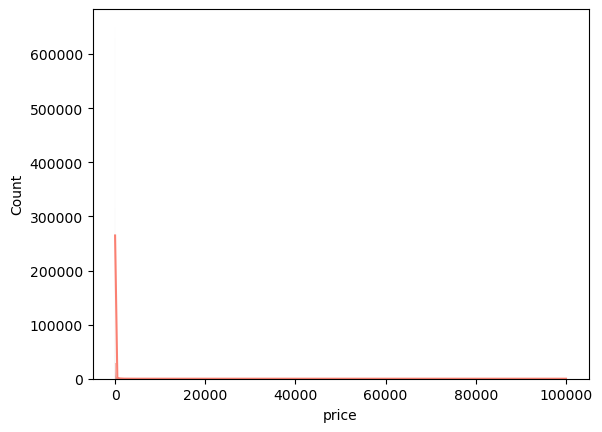

In [185]:
# Plot a histogram to visualize the distribution of product prices. 
# If its hard to read these diagrams, think why this is, and explain how it could be solved..
sns.histplot(df["price"], kde=True, bins=10000, color="salmon")
plt.show()

In [224]:
# With over 2.4 million rows and a wide range of prices, your histogram is probably:
# Extremely skewed (especially if there are a few very high prices),
# Squished into one side, making it hard to interpret,
# Or just overloaded with bars.

# Discretizing 'price' into 10 categories?
df['price_quantile'] = pd.qcut(df['price'], q=10, labels=['Q1', 'Q2', 'Q3', 'Q4','Q5','Q6','Q7','Q8','Q9','Q10'],)
df['price_quantile'].value_counts()
sns.histplot(df['price_quantile'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

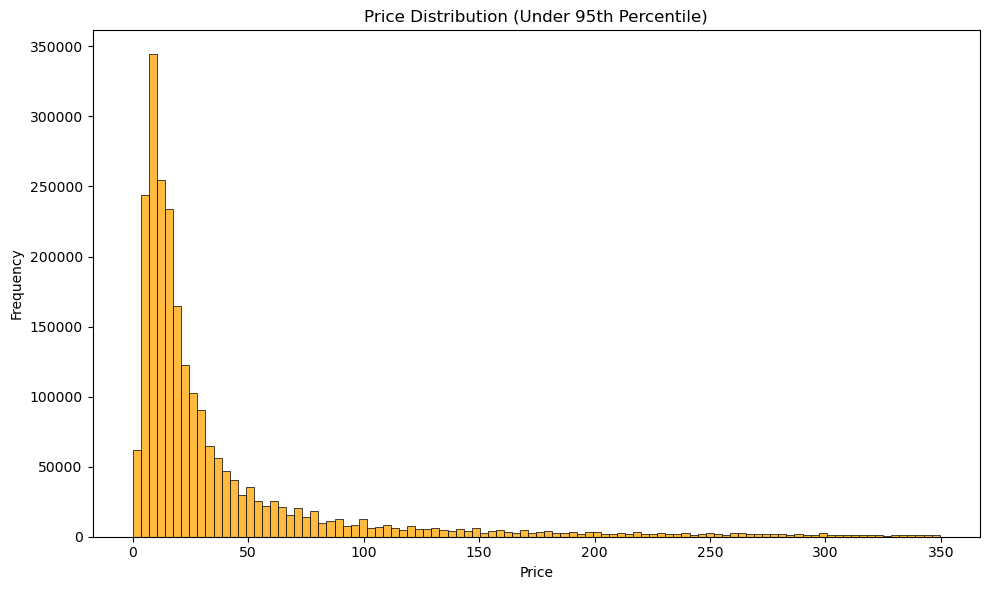

In [229]:
# Use percentiles to exclude outliers
upper_limit = df['price'].quantile(0.95)

plt.figure(figsize=(10,6))
sns.histplot(df[df['price'] < upper_limit]['price'], bins=100, color='orange')
plt.title("Price Distribution (Under 95th Percentile)")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

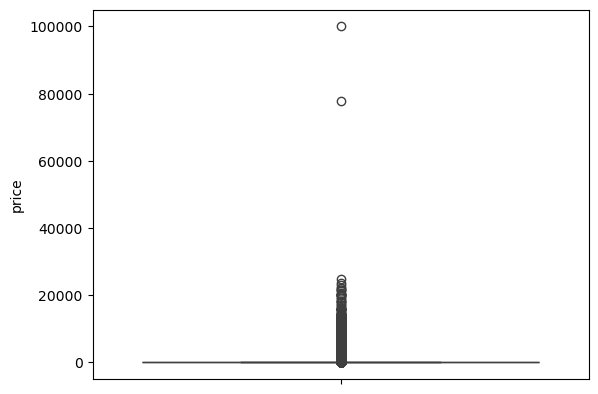

In [239]:
# Are there products that are priced significantly higher than the rest? 
# Use a box plot to showcase the spread and potential outliers in product pricing.
sns.boxplot(data = df['price'])
plt.show()

In [ ]:
# Part 3: Unpacking Product Ratings
# Business Question: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

In [251]:
df['stars']

0         4.70
1         4.70
2         4.70
3         4.70
4         4.60
          ... 
2443646   0.00
2443647   0.00
2443648   0.00
2443649   4.30
2443650   4.50
Name: stars, Length: 2443651, dtype: float64

In [249]:
# Measures of Centrality:
# Calculate the mean, median, and mode for the rating of products.
mean_rating = round(df['stars'].mean(),2)
median_rating = df['stars'].median()
mode_rating = df['stars'].mode()[0]

mean_rating, median_rating, mode_rating
# How do customers generally rate products? Is there a common trend?


(2.15, 0.0, 0.0)

In [255]:
# Measures of Dispersion:
# Determine the variance, standard deviation, and interquartile range for product rating.
# Are the ratings consistent, or is there a wide variation in customer feedback?
std_rating = round(df['stars'].std(),2) # 标准差
var_rating= round(df['stars'].var(),2) # 方差
min_rating = round(df['stars'].min(),2)
max_rating = round(df['stars'].max(),2)
range_rating = round(max_rating - min_rating,2)
std_rating, var_rating, min_rating, max_rating, range_rating


(2.19, 4.82, 0.0, 5.0, 5.0)

In [265]:
# Shape of the Distribution:

# Calculate the skewness and kurtosis for the rating column.
# Are the ratings normally distributed, or do they lean towards higher or lower values?
skewness_rating = round(df['stars'].skew(),2) # how to the right or left, positive means?
kurtosis_rating = round(df['stars'].kurtosis(),2) # how high is the peak
skewness_rating , kurtosis_rating

(0.08, -1.93)

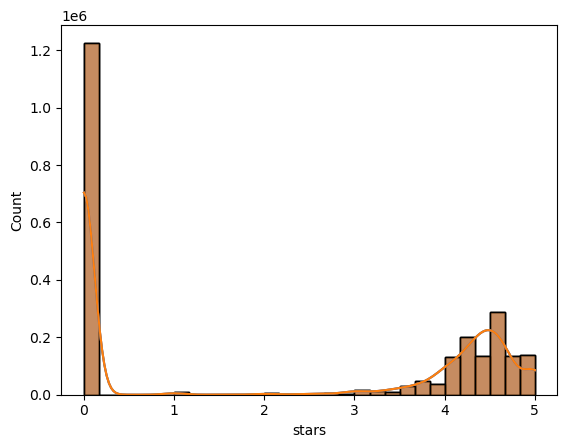

In [271]:
# Visualizations:

# Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?
sns.histplot(df['stars'],kde=True, bins=30)
plt.show()